<a href="https://colab.research.google.com/github/2303A51269/NLPLAB/blob/main/05-09-2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contro


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


Top 20 Disaster Words:
[('many injured', np.float64(0.13369863132623244)), ('many', np.float64(0.13369863132623244)), ('earthquake shake', np.float64(0.13369863132623244)), ('earthquake', np.float64(0.13369863132623244)), ('city many', np.float64(0.13369863132623244)), ('shake city', np.float64(0.1

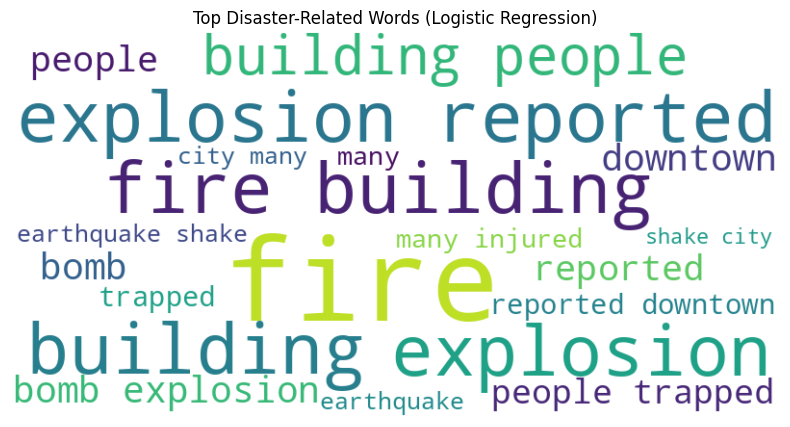

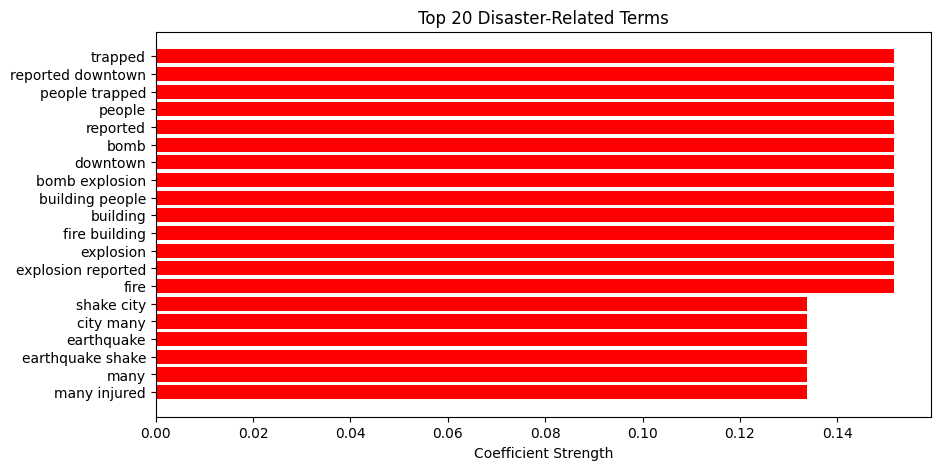


=== Model Performance Summary ===
                     Accuracy  Precision  Recall  F1-score
Logistic Regression       0.5        0.0     0.0       0.0
Random Forest             0.5        0.0     0.0       0.0
Decision Tree             0.5        0.0     0.0       0.0


In [29]:

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
import matplotlib.pyplot as plt
from wordcloud import WordCloud



nltk.download("stopwords")
nltk.download("punkt")
nltk.download("punkt_tab")   # FIX for LookupError
nltk.download("wordnet")

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()


data = {
    "text": [
        "Fire in the building, people are trapped!",
        "I love sunny days and ice cream :)",
        "Earthquake shakes the city, many injured.",
        "Just bought a new phone, so excited!",
        "Floods destroyed hundreds of homes",
        "Having a great time at the party",
        "Bomb explosion reported downtown",
        "Enjoying a peaceful walk in the park"
    ],
    "target": [1, 0, 1, 0, 1, 0, 1, 0]  # 1 = disaster, 0 = non-disaster
}
df = pd.DataFrame(data)


def clean_tweet(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)       # remove URLs
    text = re.sub(r"[^a-z\s]", "", text)      # remove punctuation & numbers
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

df["clean_text"] = df["text"].apply(clean_tweet)


X = df["clean_text"]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="binary")

    results[name] = {"Accuracy": acc, "Precision": precision, "Recall": recall, "F1-score": f1}
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))


log_reg = models["Logistic Regression"]

feature_names = np.array(tfidf.get_feature_names_out())
coeffs = log_reg.coef_[0]

# Top disaster words
top_disaster_idx = np.argsort(coeffs)[-20:]
top_disaster_words = feature_names[top_disaster_idx]
top_disaster_vals = coeffs[top_disaster_idx]

# Top non-disaster words
top_nondis_idx = np.argsort(coeffs)[:20]
top_nondis_words = feature_names[top_nondis_idx]
top_nondis_vals = coeffs[top_nondis_idx]

print("\nTop 20 Disaster Words:")
print(list(zip(top_disaster_words, top_disaster_vals)))
print("\nTop 20 Non-Disaster Words:")
print(list(zip(top_nondis_words, top_nondis_vals)))


disaster_dict = dict(zip(top_disaster_words, top_disaster_vals))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(disaster_dict)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Top Disaster-Related Words (Logistic Regression)")
plt.show()

plt.figure(figsize=(10,5))
plt.barh(top_disaster_words, top_disaster_vals, color="red")
plt.xlabel("Coefficient Strength")
plt.title("Top 20 Disaster-Related Terms")
plt.show()


results_df = pd.DataFrame(results).T
print("\n=== Model Performance Summary ===")
print(results_df)
